# Proyek Klasifikasi Gambar: Fruits Images (Apple, Mango, Guava, Banana, Dragon Fruit, and Pomegranate)
- **Nama:** Agus Saputra Kambea
- **Email:** agussaputrakambea@gmail.com
- **ID Dicoding:** Agus Saputra Kambea

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import libraries for image processing and handling
from PIL import Image
import os
import random
import shutil
import pathlib
from pathlib import Path

# Import TensorFlow and Keras components
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for numerical and machine learning tasks
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


## Data Preparation

### Data Loading

In [ ]:
# Menghubungkan Google Drive
# from google.colab import drive
# drive.mount('/content/drive/')

In [ ]:
# dataset_path = "drive/MyDrive/datasets/fruits/"
dataset_path = "dataset/fruits/"

In [ ]:
def print_images_resolution(directory):
    unique_sizes = set()
    total_images = 0

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        image_files = os.listdir(subdir_path)
        num_images = len(image_files)
        print(f"{subdir}: {num_images}")
        total_images += num_images

        for img_file in image_files:
            img_path = os.path.join(subdir_path, img_file)
            with Image.open(img_path) as img:
                unique_sizes.add(img.size)

        for size in unique_sizes:
            print(f"- {size}")
        print("---------------")

    print(f"\nTotal: {total_images}")

In [ ]:
print_images_resolution(dataset_path)

Apple: 2176
- (520, 383)
- (950, 534)
- (1200, 1600)
- (500, 334)
- (1800, 1800)
- (3436, 2412)
- (2223, 2223)
- (614, 780)
- (322, 294)
- (1600, 1213)
- (333, 300)
- (380, 253)
- (480, 322)
- (2560, 1600)
- (765, 573)
- (3264, 2448)
- (750, 600)
- (269, 266)
- (384, 314)
- (290, 276)
- (1185, 802)
- (500, 333)
- (256, 192)
- (256, 256)
- (1600, 1200)
- (300, 357)
- (1757, 2700)
- (2120, 2816)
- (270, 264)
- (192, 256)
- (1024, 768)
- (350, 275)
- (2218, 2216)
- (2892, 2093)
- (1672, 1200)
- (320, 258)
- (2250, 2421)
- (400, 400)
- (345, 348)
- (1800, 2700)
---------------
Banana: 2070
- (1000, 776)
- (1903, 2331)
- (475, 357)
- (520, 383)
- (1000, 599)
- (950, 534)
- (1500, 995)
- (1600, 1067)
- (1200, 1600)
- (500, 334)
- (1800, 1800)
- (3436, 2412)
- (2223, 2223)
- (1920, 1200)
- (425, 282)
- (614, 780)
- (322, 294)
- (1600, 1213)
- (333, 300)
- (380, 253)
- (1680, 1050)
- (300, 300)
- (480, 322)
- (2560, 1600)
- (765, 573)
- (425, 353)
- (3264, 2448)
- (750, 600)
- (269, 266)
- (38

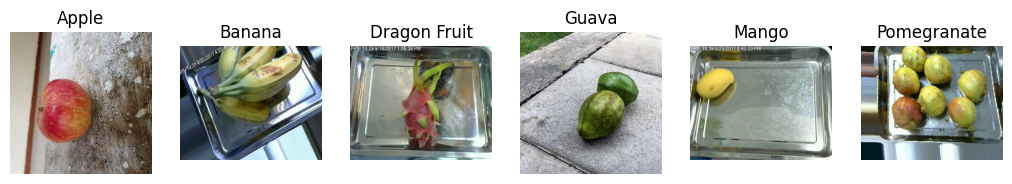

In [ ]:
# Fungsi untuk menampilkan satu gambar acak dari setiap kelas
def display_random_image_per_class(folder_path):
    # Ambil daftar subfolder (kelas) dalam folder dataset
    class_folders = [os.path.join(folder_path, class_name) for class_name in os.listdir(folder_path)
                     if os.path.isdir(os.path.join(folder_path, class_name))]

    # Menyimpan gambar acak dari setiap kelas
    random_images = []
    for class_folder in class_folders:
        image_name = random.choice(os.listdir(class_folder))
        image_path = os.path.join(class_folder, image_name)
        random_images.append((Image.open(image_path), os.path.basename(class_folder)))

    # Menampilkan gambar-gambar acak
    plt.figure(figsize=(15, 15))
    for i, (img, label) in enumerate(random_images):
        ax = plt.subplot(1, 7, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(label)
    plt.show()


# Panggil fungsi untuk menampilkan gambar acak dari setiap kelas
display_random_image_per_class(dataset_path)

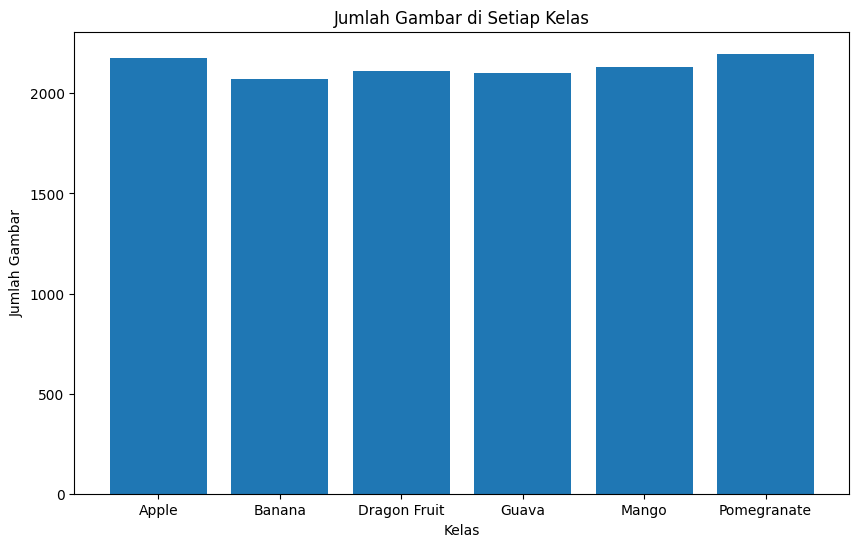

In [ ]:
# Menghitung jumlah gambar di setiap kelas
class_counts = {}
for class_name in os.listdir(dataset_path):
  class_path = os.path.join(dataset_path, class_name)
  if os.path.isdir(class_path):
    class_counts[class_name] = len(os.listdir(class_path))

# Menampilkan jumlah gambar di setiap kelas dalam grafik
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.title('Jumlah Gambar di Setiap Kelas')
plt.show()


### Data Preprocessing

#### Split Dataset

In [ ]:
# Path ke folder dataset yang berisi subfolder untuk setiap kelas
train_dir = 'dataset/train'
test_dir = 'dataset/test'

Membagi data menjadi 80:20

In [ ]:
# Membuat folder untuk data training dan validation
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Mendapatkan daftar kelas (subfolder di dalam dataset_path)
classes = os.listdir(dataset_path)

# Membagi data untuk setiap kelas
for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    images = os.listdir(class_path)

    # Membagi data menjadi train (80%) dan validation (20%)
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    # Membuat folder untuk kelas jika belum ada
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

    # Pindahkan gambar ke folder training
    for img in train_images:
        shutil.move(os.path.join(class_path, img), os.path.join(train_dir, cls, img))

    # Pindahkan gambar ke folder validation
    for img in test_images:
        shutil.move(os.path.join(class_path, img), os.path.join(test_dir, cls, img))

print("Pembagian data selesai.")

Pembagian data selesai.


In [ ]:
print("Total number of Apple images in training set: ",len(os.listdir(train_dir + '/Apple')))
print("Total number of Banana images in training set: ",len(os.listdir(train_dir  + '/Banana')))
print("Total number of Dragon Fruit images in training set: ",len(os.listdir(train_dir  + '/Dragon Fruit')))
print("Total number of Guava images in training set: ",len(os.listdir(train_dir  + '/Guava')))
print("Total number of Mango images in training set: ",len(os.listdir(train_dir  + '/Mango')))
print("Total number of Pomegranate images in training set: ",len(os.listdir(train_dir  + '/Pomegranate')))
print("--------------------------------------------------------")
print("Total number of Apple images in test set: ",len(os.listdir(test_dir + '/Apple')))
print("Total number of Banana images in test set: ",len(os.listdir(test_dir  + '/Banana')))
print("Total number of Dragon Fruit images in test set: ",len(os.listdir(test_dir  + '/Dragon Fruit')))
print("Total number of Guava images in test set: ",len(os.listdir(test_dir  + '/Guava')))
print("Total number of Mango images in test set: ",len(os.listdir(test_dir  + '/Mango')))
print("Total number of Pomegranate images in test set: ",len(os.listdir(test_dir  + '/Pomegranate')))

Total number of Apple images in training set:  1740
Total number of Banana images in training set:  1656
Total number of Dragon Fruit images in training set:  1691
Total number of Guava images in training set:  1680
Total number of Mango images in training set:  1706
Total number of Pomegranate images in training set:  1758
--------------------------------------------------------
Total number of Apple images in test set:  436
Total number of Banana images in test set:  414
Total number of Dragon Fruit images in test set:  423
Total number of Guava images in test set:  421
Total number of Mango images in test set:  427
Total number of Pomegranate images in test set:  440


#### Image Data Generator

In [ ]:
# Pengaturan data generator untuk augmentasi data
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalisasi pixel gambar
    rotation_range=20,
    height_shift_range=0.2,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load data pelatihan dan validasi
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_datagen = ImageDataGenerator(rescale=1./255,)
validation_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 10231 images belonging to 6 classes.
Found 2561 images belonging to 6 classes.


## Modelling

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # Menggunakan softmax untuk 3 kelas atau lebih
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Menampilkan arsitektur model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import Callback

In [ ]:
# Membuat callback ModelCheckpoint untuk menyimpan model terbaik berdasarkan val_accuracy
callback = callbacks.ModelCheckpoint('best_model.h5',
                                     monitor='val_accuracy',
                                     save_best_only=True,
                                     mode='max',
                                     verbose=1)

In [ ]:
# Membuat callback custom untuk menghentikan pelatihan jika akurasi mencapai 95%
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Mengecek akurasi pelatihan dan validasi
        train_accuracy = logs.get('accuracy')
        val_accuracy = logs.get('val_accuracy')

        # Jika akurasi pelatihan dan validasi keduanya di atas 95%, hentikan pelatihan
        if train_accuracy >= 0.96 and val_accuracy >= 0.96:
            print("\nAkurasi pelatihan dan validasi mencapai 96%, menghentikan pelatihan...")
            self.model.stop_training = True

In [ ]:
# train model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    callbacks=[callback, CustomCallback()]
)

Epoch 1/25
320/320 [==============================] - ETA: 0s - loss: 1.3291 - accuracy: 0.5245
Epoch 1: val_accuracy improved from -inf to 0.55720, saving model to best_model.h5


c:\Users\ThinkPad\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


320/320 [==============================] - 522s 2s/step - loss: 1.3291 - accuracy: 0.5245 - val_loss: 1.3370 - val_accuracy: 0.5572
Epoch 2/25
320/320 [==============================] - ETA: 0s - loss: 0.6863 - accuracy: 0.7636
Epoch 2: val_accuracy improved from 0.55720 to 0.87036, saving model to best_model.h5
320/320 [==============================] - 383s 1s/step - loss: 0.6863 - accuracy: 0.7636 - val_loss: 0.4743 - val_accuracy: 0.8704
Epoch 3/25
320/320 [==============================] - ETA: 0s - loss: 0.5081 - accuracy: 0.8270
Epoch 3: val_accuracy improved from 0.87036 to 0.90472, saving model to best_model.h5
320/320 [==============================] - 401s 1s/step - loss: 0.5081 - accuracy: 0.8270 - val_loss: 0.3063 - val_accuracy: 0.9047
Epoch 4/25
320/320 [==============================] - ETA: 0s - loss: 0.3968 - accuracy: 0.8612
Epoch 4: val_accuracy improved from 0.90472 to 0.93440, saving model to best_model.h5
320/320 [==============================] - 398s 1s/step - 

## Evaluasi dan Visualisasi

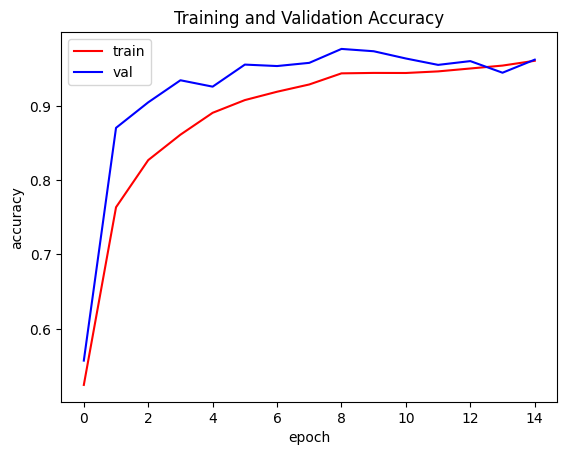

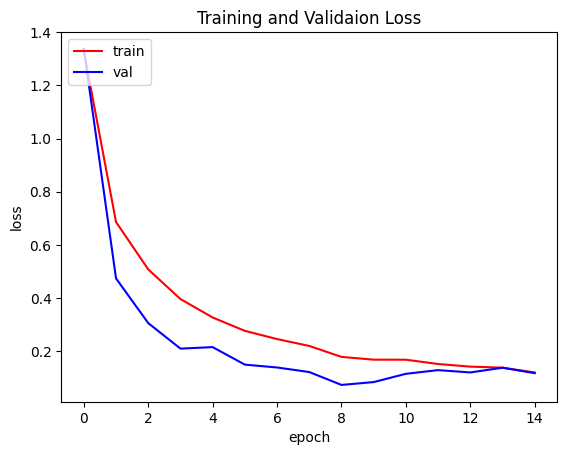

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

81/81 [==============================] - 54s 665ms/step


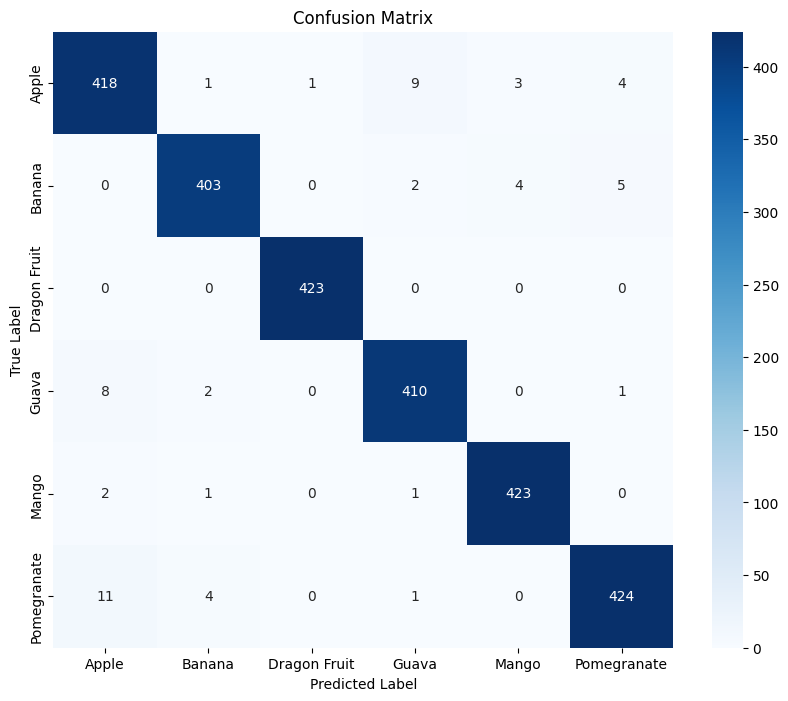

In [ ]:
# Lakukan prediksi pada data validasi atau test set
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Ambil kelas dengan probabilitas tertinggi
y_true = validation_generator.classes  # Label sebenarnya dari validation_generator

# Buat confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Visualisasikan confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Konversi Model

In [2]:
model = tf.keras.models.load_model('best_model.h5')

##### SavedModel

In [3]:
# Menyimpan model dalam format SavedModel
save_path = 'saved_model/1/'
tf.saved_model.save(model, save_path)

INFO:tensorflow:Assets written to: saved_model/1/assets


INFO:tensorflow:Assets written to: saved_model/1/assets


##### TF-Lite

In [ ]:
# Konversi model ke TF-Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Tentukan nama folder dan nama file
output_folder = "tflite_model"
output_file = "model.tflite"

# Buat folder jika belum ada
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Simpan model TFLite ke dalam folder
output_path = os.path.join(output_folder, output_file)
with open(output_path, 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ThinkPad\AppData\Local\Temp\tmpji_xzvdc\assets


INFO:tensorflow:Assets written to: C:\Users\ThinkPad\AppData\Local\Temp\tmpji_xzvdc\assets


##### TFJS
Untuk konversi model ke tfjs disini saya menggunakan google collab

In [1]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 860.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 806.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 18.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully un

In [2]:
import tensorflowjs as tfjs
from google.colab import drive

In [3]:
# menghubungkan collab ke google drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# load file model.h5 dari google drive
model = tf.keras.models.load_model('drive/MyDrive/klasifikasiBuah/best_model.h5')

# konfersi model ke tfjs
tfjs.converters.save_keras_model(model, "model_tfjs/")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


failed to lookup keras version from the file,
    this is likely a weight only file


## Inference Using SavedModel

In [4]:
# import library
import requests
import tensorflow as tf

In [5]:
def images_preprocessing(filename):
    
    image = tf.io.decode_image(open(filename, 'rb').read(), channels=3)
    image = tf.image.resize(image, [150, 150])
    image = image/255.
    
    image_tensor = tf.expand_dims(image, 0)
    image_tensor = image_tensor.numpy().tolist()
    
    return image_tensor

In [22]:
filename = 'images/dragon-fruit.jpeg'

# Prepare the data that is going to be sent in the POST request
image_tensor = images_preprocessing(filename=filename)
json_data = {
    "instances": image_tensor
}

# Define the endpoint with format: http://localhost:8501/v1/models/MODEL_NAME:predict
endpoint = "http://localhost:8501/v1/models/fruits_model:predict"

# Send the request to the Prediction API
response = requests.post(endpoint, json=json_data)

map_labels = {0: "Apple", 1: "Banana", 2: "Dragon Fruit", 3: "Guava", 4: "Mango", 5: "Pomegranate"}
prediction = tf.argmax(response.json()['predictions'][0]).numpy()
print(map_labels[prediction])

Dragon Fruit
